# 2. Reinforcement Learning

There are 3 files:
1. `maze.py`: defines the `MazeEnv` class, the simulation environment which the Q-learning agent will interact in.
2. `qlearning.py`: defines the `qlearn` function which you will implement, along with several helper functions. Follow the instructions in the file.
3. `plotting_utils.py`: defines several plotting and visualization utilities. In particular, you will use `plot_steps_vs_iters`, `plot_several_steps_vs_iters`, `plot_policy_from_q`

In [1]:
import numpy as np
from qlearning import qlearn
from maze import MazeEnv, ProbabilisticMazeEnv
from plotting_utils import plot_steps_vs_iters, plot_several_steps_vs_iters, plot_policy_from_q

## 1. Basic Q Learning experiments

(a) Run your algorithm several times on the given environment. Use the following hyperparameters:
1. Number of episodes = 200
2. Alpha ($\alpha$) learning rate = 1.0
3. Maximum number of steps per episode = 100. An episode ends when the agent reaches a goal state, or uses the maximum number of steps per episode
4. Gamma ($\gamma$) discount factor = 0.9
5. Epsilon ($\epsilon$) for $\epsilon$-greedy = 0.1 (10% of the time). Note that we should "break-ties" when the Q-values are zero for all the actions (happens initially) by essentially choosing uniformly from the action. So now you have two conditions to act randomly: for epsilon amount of the time, or if the Q values are all zero.


In [2]:
# TODO: Fill this in
num_iters = 200
alpha = 1.0
gamma = 0.9
epsilon = 0.1
max_steps = 100
# According to question ,we are going to use epsilon, so use_softmax_policy=F
use_softmax_policy = False

# TODO: Instantiate the MazeEnv environment with default arguments
env = MazeEnv()

# TODO: Run Q-learning:
q_hat, steps_vs_iters = qlearn(env,num_iters,alpha,gamma,epsilon,max_steps,use_softmax_policy)

Plot the steps to goal vs training iterations (episodes):

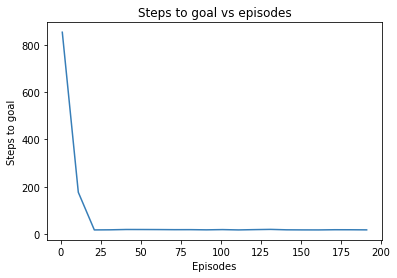

In [3]:
# TODO: Plot the steps vs iterations
plot_steps_vs_iters(steps_vs_iters)

Visualize the learned greedy policy from the Q values:

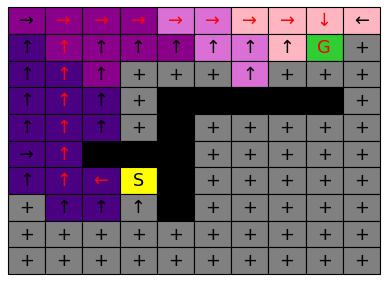

<Figure size 720x720 with 0 Axes>

In [4]:
# TODO: plot the policy from the Q value
plot_policy_from_q(q_hat,env)

First of all, my implementation is kind of wrong. I failed to figure out how to 'break tie' correctly, so if there is a upper cap for num_sample, then the algorithm can not covnerge. Based on what I have, for epsilon greedy approach, the algorithm have to run a large number of iterations in initial batches, but with trained policy, number of iterations each batches reduced fast, and reach convergence in a small number of batches.

(b) Run your algorithm by passing in a list of 2 goal locations: (1,8) and (5,6). Note: we are using 0-indexing, where (0,0) is top left corner. Report on the results.

For part (b), problem and convergence speed issues are same as part1. I tried to experiment several times, but the resultant policy function always lead to the upper-right goal. The reason might still lies with 'break ties' issues.

In [5]:
# TODO: Fill this in (same as before)
num_iters = 200
alpha = 1.0
gamma = 0.9
epsilon = 0.1
max_steps = 100
use_softmax_policy = False

# TODO: Set the goal
goal_locs = [[1,8],[5,6]]
env = MazeEnv(goals=goal_locs)

# TODO: Run Q-learning:
q_hat, steps_vs_iters = qlearn(env,num_iters,alpha,gamma,epsilon,max_steps,use_softmax_policy)

Plot the steps to goal vs training iterations (episodes):

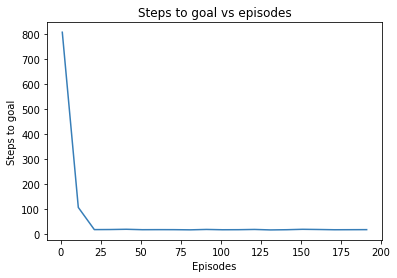

In [6]:
# TODO: Plot the steps vs iterations
plot_steps_vs_iters(steps_vs_iters)

Plot the steps to goal vs training iterations (episodes):

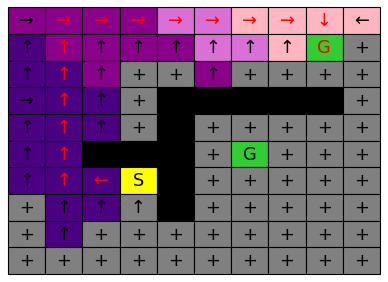

<Figure size 720x720 with 0 Axes>

In [7]:
# TODO: plot the policy from the Q values
plot_policy_from_q(q_hat,env)

## 2. Experiment with the exploration strategy, in the original environment

(a) Try different $\epsilon$ values in $\epsilon$-greedy exploration: We asked you to use a rate of $\epsilon$=10%, but try also 50% and 1%. Graph the results (for 3 epsilon values) and discuss the costs and benefits of higher and lower exploration rates.

As epsilon increases, the algorithm converge faster. But I can hardly tell if this is a true statement overall. I believe causation of this sitution is still my failure to 'break ties', so with larger epsilon, $\epsilon$-greedy function will be more likely to take a random direction sampled from uniform distribution, and therefore get rid of looping over 0 faster.

In [8]:
# TODO: Fill this in (same as before)
num_iters = 200
alpha = 1.0
gamma = 0.9
max_steps = 100
use_softmax_policy = False

# TODO: set the epsilon lists in increasing order:
epsilon_list = [0.1,0.5,0.01]

env = MazeEnv()

steps_vs_iters_list = []
for epsilon in epsilon_list:
    q_hat, steps_vs_iters = qlearn(env,num_iters,alpha,gamma,epsilon,max_steps,use_softmax_policy)
    steps_vs_iters_list.append(steps_vs_iters)

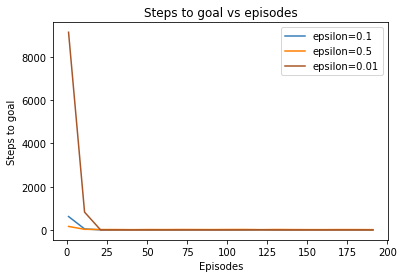

In [9]:
# TODO: Plot the results
label_list = ["epsilon={}".format(eps) for eps in epsilon_list]
plot_several_steps_vs_iters(steps_vs_iters_list,label_list)

(b) Try exploring with policy derived from **softmax of Q-values** described in the Q learning lecture. Use the values of $\beta \in \{1, 3, 6\}$ for your experiment, keeping $\beta$ fixed throughout the training.

Due to my failure to break tie, softmax approaches with no randomness failed to compile, since the input Q is a matrix of zero, and therefore softmax_policy() and stable_softmanx() will always return 0, which represent action 'UP', which is a barrier using our maze. Then curr_state==next_state, things just looping over and over agian without any progress.

In [ ]:
# TODO: Fill this in for Static Beta with softmax of Q-values
num_iters = 200
alpha = 1.0
gamma = 0.9
epsilon = 0.1
max_steps = 100

# TODO: Set the beta
beta_list = [1,3,6]
use_softmax_policy = True
k_exp_schedule = 0 # (float) choose k such that we have a constant beta during training
# refer to the function beta_exp_schedule(init_beta, iteration, k=0.1),
# beta = init_beta * np.exp(k * iteration)
# to hold beta constant, we want k * iteration to be zero
# then simply set k to 0 will do the work

env = MazeEnv()
steps_vs_iters_list = []
for beta in beta_list:
    q_hat, steps_vs_iters = qlearn(env,num_iters,alpha,gamma,epsilon,max_steps,use_softmax_policy,beta,k_exp_schedule)
    steps_vs_iters_list.append(steps_vs_iters)

In [ ]:
label_list = ["beta={}".format(beta) for beta in beta_list]
# TODO:
plot_several_steps_vs_iters(steps_vs_iters_list,label_list)

(c) Instead of fixing the $\beta = \beta_0$ to the initial value, we will increase the value of $\beta$ as the number of episodes $t$ increase:

$$\beta(t) = \beta_0 e^{kt}$$

That is, the $\beta$ value is fixed for a particular episode.
Run the training again for different values of $k \in \{0.05, 0.1, 0.25, 0.5\}$, keeping $\beta_0 = 1.0$. Compare the results obtained with this approach to those obtained with a static $\beta$ value.

In [ ]:
# TODO: Fill this in for Dynamic Beta
num_iters = 200
alpha = 1.0
gamma = 0.9
epsilon = 0.1
max_steps = 100

# TODO: Set the beta
beta = 1.0
use_softmax_policy = True
k_exp_schedule_list = [0.05,0.1,0.25,0.5]
env = MazeEnv()

steps_vs_iters_list = []
for k_exp_schedule in k_exp_schedule_list:
    q_hat, steps_vs_iters = qlearn(env,num_iters,alpha,gamma,epsilon,max_steps,use_softmax_policy,beta,k_exp_schedule)
    steps_vs_iters_list.append(steps_vs_iters)

In [ ]:
# TODO: Plot the steps vs iterations
label_list = ["k={}".format(k_exp_schedule) for k_exp_schedule in k_exp_schedule_list]
plot_several_steps_vs_iters(steps_vs_iters_list,label_list)

## 3. Stochastic Environments

(a) Make  the  environment  stochastic  (uncertain),  such  that  the  agent  only  has  a  95% chance  of  moving  in  the  chosen  direction,  and  has  a  5%  chance  of  moving  in  some random direction.

Implementation of child class can be found in attached code. Basically what I did is simply add an if chunk to step() function of maze, condition is if a uniform sample is less than p_random, if so, randomly pick an action to substitute original input action.
On my output graph, as p_random increase, convergence is getting faser. But I can hardly tell if this is actually true. Based on my understanding, reason for this observation is still failure to 'break tie'. So with a large chance of not using input action, the algorithm will get out from the 0 loop faster.

In [ ]:
# TODO: Implement ProbabilisticMazeEnv in maze.py

(b) Change the learning rule to handle the non-determinism, and experiment with different probability of environment performing random action $p_{rand} \in \{0.05, 0.1, 0.25, 0.5\}$ in this new rule. How does performance vary as the environment becomes more stochastic?

Use the same parameters as in first part, except change the alpha ($\alpha$) value to be **less than 1**, e.g. 0.5.

In [10]:
# TODO: Use the same parameters as in the first part, except change alpha
num_iters = 200
alpha = 0.5
gamma = 0.9
epsilon = 0.1
max_steps = 100
use_softmax_policy = False

# Set the environment probability of random
env_p_rand_list = [0.05,0.1,0.25,0.5]

steps_vs_iters_list = []
for env_p_rand in env_p_rand_list:
    # Instantiate with ProbabilisticMazeEnv
    env = ProbabilisticMazeEnv(p_random=env_p_rand)

    # Note: We will repeat for several runs of the algorithm to make the result less noisy
    avg_steps_vs_iters = np.zeros(num_iters)
    for i in range(10):
        q_hat, steps_vs_iters = qlearn(env,num_iters,alpha,gamma,epsilon,max_steps,use_softmax_policy)
        avg_steps_vs_iters += steps_vs_iters
    avg_steps_vs_iters /= 10
    steps_vs_iters_list.append(avg_steps_vs_iters)

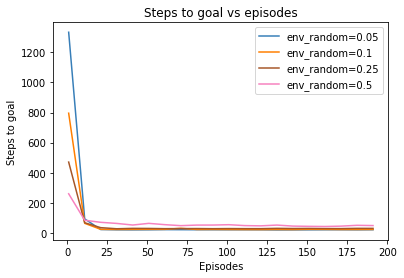

In [11]:
label_list = ["env_random={}".format(env_p_rand) for env_p_rand in env_p_rand_list]
plot_several_steps_vs_iters(steps_vs_iters_list,label_list)


# 3. Did you complete the course evaluation?

Yes

